<a href="https://colab.research.google.com/github/gabrielfas/Spotify-Playlist-Analysis/blob/master/colab-notebooks/Spotify_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -U -q PyDrive

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
folder_id = '1RNg99x6G_Mmh1smc3SrRz-Qk3PCj8Cys'
folder = drive.ListFile({'q': "'{}' in parents and trashed=false".format(folder_id)})

file_list = folder.GetList()

csvfiles_id = file_list[1]['id']
for file in file_list[2:]:
    file.GetContentFile(file['title'])
    

In [7]:
csv_folder = drive.ListFile({'q': "'{}' in parents and trashed=false".format(csvfiles_id)})

csv_list = csv_folder.GetList()
for file in csv_list:
    print(file.GetContentFile(file['title']))

None


In [0]:
file_list[0].GetContentFile(file_list[0]['title'])

In [9]:
!pip install -r requirements.txt

    100% |████████████████████████████████| 296kB 6.1MB/s 
    100% |████████████████████████████████| 14.7MB 2.1MB/s 
    100% |████████████████████████████████| 61kB 18.6MB/s 
    100% |████████████████████████████████| 51kB 18.5MB/s 
    100% |████████████████████████████████| 952kB 15.5MB/s 
    100% |████████████████████████████████| 12.6MB 2.9MB/s 
    100% |████████████████████████████████| 4.0MB 9.4MB/s 
    100% |████████████████████████████████| 8.9MB 986kB/s 
    100% |████████████████████████████████| 696kB 19.5MB/s 
    100% |████████████████████████████████| 112kB 14.6MB/s 
    100% |████████████████████████████████| 235kB 28.5MB/s 
    100% |████████████████████████████████| 61kB 22.0MB/s 
    100% |████████████████████████████████| 215kB 28.5MB/s 
    100% |████████████████████████████████| 7.4MB 4.8MB/s 
    100% |████████████████████████████████| 522kB 20.5MB/s 
    100% |████████████████████████████████| 727kB 19.1MB/s 
    100% |████████████████████████████████| 122

In [0]:
def get_genres(artists_id, spfy):
    response = spfy.artist(artists_id)
    if len(response['genres']) == 0:
      return []
    return response['genres']

In [0]:
import pandas as pd
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
import interfacespfy as isp

In [12]:
import warnings
warnings.filterwarnings('ignore')

# Altair plots render by default in JupyterLab and nteract

# Uncomment/run this line to enable Altair in the classic notebook (not in JupyterLab)
# alt.renderers.enable('notebook')

# Uncomment/run this line to enable Altair in Colab
alt.renderers.enable('colab')

RendererRegistry.enable('colab')

In [0]:
spfy = isp.login_user('12144777067')

In [16]:
musics = isp.get_favorite_songs(spfy)
pdmusics = pd.DataFrame(musics)
#pdmusics.set_index(['id'], inplace=True)
pdmusics.head()

,album,album_id,artist,artist_id,duration_ms,id,name,popularity
0,Beautiful People Will Ruin Your Life (Extended...,7CPPcbdyAhAF1PEWCnm4DY,The Wombats,0Ya43ZKWHTKkAbkoJJkwIB,214432,08JTB5hpXPCVPGJzic8E9e,Bee-Sting,42
1,"Proudly Present....A Guide To Love, Loss & Des...",75l5Bqvc0BH45UhJrS04Xj,The Wombats,0Ya43ZKWHTKkAbkoJJkwIB,191293,7v9Ne4758aGFfFc5avh89h,Let's Dance To Joy Division,65
2,Beautiful People Will Ruin Your Life,4kUbTSoTsbKP5MRdYMDBx1,The Wombats,0Ya43ZKWHTKkAbkoJJkwIB,219481,4w9TBRGhvbhiLQB8jVCusl,Cheetah Tongue,63
3,Beautiful People Will Ruin Your Life,4kUbTSoTsbKP5MRdYMDBx1,The Wombats,0Ya43ZKWHTKkAbkoJJkwIB,207679,11IJA30efHAJLO3qroPh5L,Turn,64
4,"Proudly Present....A Guide To Love, Loss & Des...",75l5Bqvc0BH45UhJrS04Xj,The Wombats,0Ya43ZKWHTKkAbkoJJkwIB,210560,7GvkOFkNsM6Exnkyqeajqm,Moving To New York,64


In [17]:
mix_musics = pdmusics.sample(frac=1)
mix_musics.head()

,album,album_id,artist,artist_id,duration_ms,id,name,popularity
142,"good kid, m.A.A.d city (Deluxe)",748dZDqSZy6aPXKcI9H80u,Kendrick Lamar,2YZyLoL8N0Wb9xBt1NhZWg,256213,0NfYAsKygCYwPA2BgTZ1qg,Now Or Never - Bonus Track,51
501,Inside In / Inside Out,03JPFQvZRnHHysSZrSFmKY,The Kooks,1GLtl8uqKmnyCWxHmw9tL4,189567,12neqgXbe73JFQUhv9fgjO,Matchbox,48
168,Inside In / Inside Out,03JPFQvZRnHHysSZrSFmKY,The Kooks,1GLtl8uqKmnyCWxHmw9tL4,206932,0UDFYzrb5copPflRuheuPJ,I Want You,43
562,Led Zeppelin II,70lQYZtypdCALtFVlQAcvx,Led Zeppelin,36QJpDe2go2KgaRleHCDTp,263333,3MODES4TNtygekLl146Dxd,Ramble On,69
352,Music For The Motion Picture Into The Wild,3H2Mr0PkWDtgdgVKt6c8c6,Eddie Vedder,0mXTJETA4XUa12MmmXxZJh,442560,3T7ntEYaQvk8oFVv4ltCiU,Guaranteed,0


In [18]:
sel_music = mix_musics[:500]
sel_music.shape

(500, 8)

In [19]:
sel_music['genres'] = sel_music.artist_id.apply(get_genres, args=(spfy,))
sel_music.shape

retrying ...1secs
retrying ...1secs
retrying ...1secs


(500, 9)

In [20]:
genres = []
for generos in sel_music['genres']:
    for genero in generos:
        genres.append(genero)
        
pdgenres = pd.DataFrame(genres, columns=['genres'])
pdgenres.head()

,genres
0,conscious hip hop
1,hip hop
2,pop rap
3,rap
4,west coast rap


rock                 153
modern rock          133
rap                  123
hip hop              118
indie rock           117
garage rock          114
pop rap              112
conscious hip hop     78
permanent wave        56
brazilian rock        48
Name: genres, dtype: int64


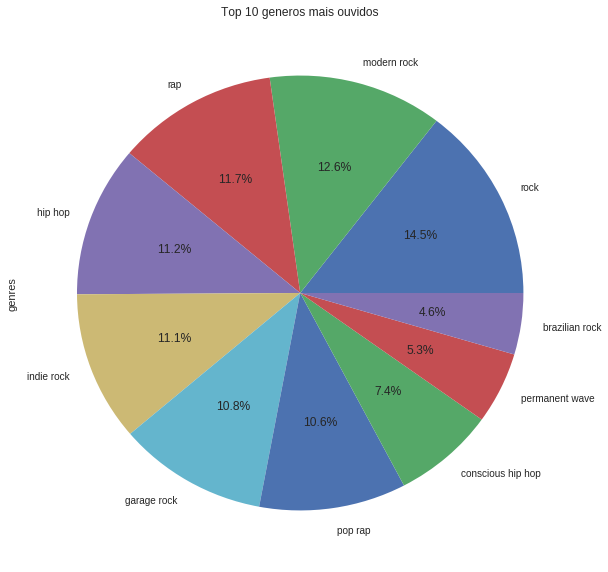

In [21]:
qtd_generos = pdgenres.genres.value_counts(ascending=False).head(10)
print(qtd_generos)
qtd_generos.plot(kind='pie', figsize=(10,10),autopct='%1.1f%%')
plt.title('Top 10 generos mais ouvidos')
plt.show()

Our Last Night         47
Maroon 5               35
Muse                   34
Boyce Avenue           34
Avenged Sevenfold      34
Supercombo             32
Eminem                 32
All Time Low           31
Imagine Dragons        30
Jimmy Eat World        29
Fall Out Boy           28
Twenty One Pilots      27
Panic! At The Disco    27
Asking Alexandria      27
Weezer                 26
Name: artist, dtype: int64


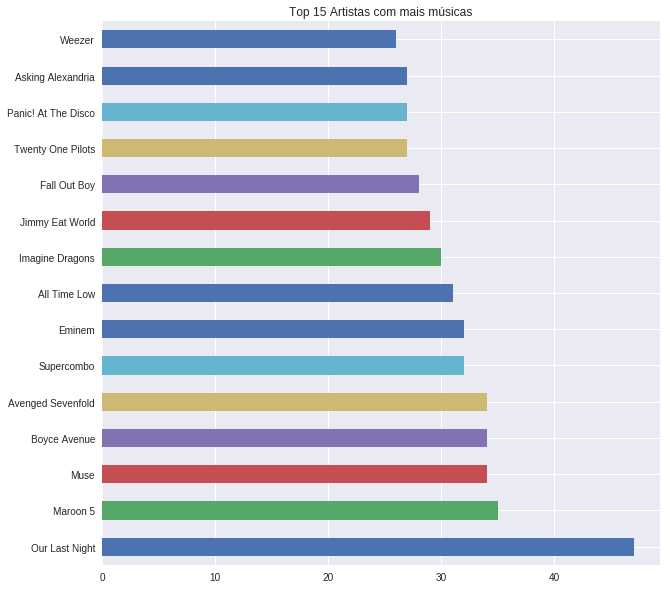

In [0]:
top_artists = pdmusics.artist.value_counts().head(15)
print(top_artists)
top_artists.plot(kind='barh', figsize=(10,10))
plt.title('Top 15 Artistas com mais músicas')
plt.show()

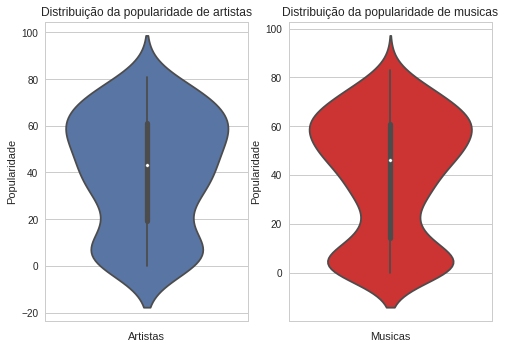

In [22]:
pop_artists = pdmusics.groupby('artist').popularity.mean().sort_values(ascending=False)
pop_artists.head(15)

sns.set(style="whitegrid")

plt.subplot(1,2,1)
sns.violinplot(y=pop_artists)
plt.title('Distribuição da popularidade de artistas')
plt.xlabel('Artistas')
plt.ylabel('Popularidade')

plt.subplot(1,2,2)
sns.violinplot(y='popularity', data=pdmusics, color='red', saturation=0.6)
plt.title('Distribuição da popularidade de musicas')
plt.xlabel('Musicas')
plt.ylabel('Popularidade')

plt.show()

In [0]:
mlist = isp.get_user_playlists(spfy, '12144777067', features=True)
namelist = isp.get_user_playlists(spfy, '12144777067')

In [24]:
musics = []
for playlist, tracks in namelist:
    for track in tracks:
        musics.append(track)
        
result = pd.DataFrame(mlist)
namedata = pd.DataFrame(musics)

alldata = pd.merge(result, namedata, how='left', on='id').drop_duplicates(subset='id')
alldata.info(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5948 entries, 0 to 12926
Data columns (total 15 columns):
acousticness        5948 non-null float64
danceability        5948 non-null float64
energy              5948 non-null float64
id                  5948 non-null object
instrumentalness    5948 non-null float64
key                 5948 non-null int64
liveness            5948 non-null float64
loudness            5948 non-null float64
mode                5948 non-null int64
speechiness         5948 non-null float64
tempo               5948 non-null float64
valence             5948 non-null float64
duration_ms         5948 non-null int64
name                5948 non-null object
popularity          5948 non-null int64
dtypes: float64(9), int64(4), object(2)
memory usage: 743.5+ KB


In [25]:
alldata.to_csv('gabriel_playlists.csv')
#files.download('gabriel_playlists.csv')

NameError: ignored

In [26]:
alldata = alldata.sample(frac=1)
alldata = alldata[:500]
alldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 6551 to 7440
Data columns (total 15 columns):
acousticness        500 non-null float64
danceability        500 non-null float64
energy              500 non-null float64
id                  500 non-null object
instrumentalness    500 non-null float64
key                 500 non-null int64
liveness            500 non-null float64
loudness            500 non-null float64
mode                500 non-null int64
speechiness         500 non-null float64
tempo               500 non-null float64
valence             500 non-null float64
duration_ms         500 non-null int64
name                500 non-null object
popularity          500 non-null int64
dtypes: float64(9), int64(4), object(2)
memory usage: 62.5+ KB


Text(0.5,1,'Correlações entre colunas')

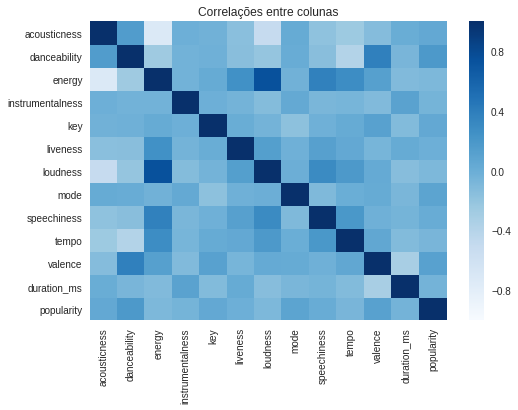

In [27]:
sns.heatmap(alldata.corr(), cmap='Blues')
plt.title('Correlações entre colunas')

In [28]:
alt.Chart(alldata).mark_point().encode(
    x='danceability',
    y='valence',
    tooltip='name',
)

Chart({
  data:        acousticness  danceability  energy                      id  \
  6551       0.018500         0.773   0.680  7rfkSx8BvyojeBczYoz8Rj   
  3529       0.000532         0.264   0.960  3wcnWZU7iLFh3H2XD3voPU   
  220        0.001690         0.657   0.960  5bU4KX47KqtDKKaLM4QCzh   
  547        0.000133         0.399   0.776  5ZuHIvkY2OOCJWEMMD5UAl   
  4271       0.010000         0.632   0.889  5fD9G4SVpMQaDMHQVwrRnc   
  7595       0.001730         0.365   0.860  255wsg35VRYqBK7uBtYOUz   
  12709      0.215000         0.462   0.595  0SzvmWfOhoxZVGrmvb56YL   
  3591       0.000696         0.518   0.797  1EFddFVisHbqCHah6oBlhD   
  5263       0.003660         0.610   0.807  4T0j2hnkoMOCeqmKD0ix8p   
  5930       0.000020         0.275   0.773  2DGFNAg4pTPLFKPeQRbGDZ   
  11603      0.297000         0.633   0.673  2qPUnoasNe4Ep43emVXEig   
  4691       0.000097         0.571   0.947  54uM0xGRrbA6UxtUF4dOUx   
  5071       0.014200         0.448   0.847  0SDHxuDtIGCsBEc4xSUc27   
  3070       0.000101         0.336   0.920  1zhuSed56xkTPxqCR9fWkF   
  7750       0.055400         0.700   0.760  5wre7EAHpqWGcAhlxaAZ5N   
  12581      0.000216         0.495   0.905  532FjiLrnEpBARLEteVwre   
  7023       0.028500         0.562   0.938  3IATFjzgKK3UbTq8idHzNK   
  12477      0.001640         0.455   0.995  1b12Q98xLA5iJNFXqTOVPb   
  3326       0.013900         0.468   0.939  6tNQw4RAj7oYogHXVzKJg8   
  5086       0.001310         0.514   0.971  1DlT3Udf11689ezYr6R8aA   
  5794       0.001040         0.346   0.829  79qct0g1MbfPTXTHWqLCzF   
  6945       0.764000         0.360   0.353  5k381xddfVEnSDIlvP1AJq   
  9096       0.000055         0.419   0.935  0ma8TafEZVYJ1Ko98R1VWx   
  3247       0.005750         0.502   0.966  34hoCwSsssai61QCqzGYtX   
  1547       0.074800         0.609   0.779  4rJTwIvqbJLhvO5sKGOpgJ   
  10223      0.000423         0.515   0.888  69bJ5acrzf0ApqUMkkbNZw   
  12761      0.000031         0.384   0.990  5iKbXzOt4GFxPZxin2QGb8   
  4112       0.023000         0.559   0.914  22qQjtiv3Xy1P8WvpA6HgR   
  11618      0.279000         0.696   0.832  3lJA6dGqvaKtVxqHbTtQiQ   
  10096      0.000439         0.379   0.984  3UiknG2zW9hCpQ7hbZuwxF   
  ...             ...           ...     ...                     ...   
  5915       0.000760         0.395   0.830  6GUu5rPQqJfTp3YbxoSKM0   
  6035       0.000547         0.537   0.978  651NhV1agY7LNLs3OWOIBK   
  7745       0.195000         0.568   0.503  4JFXNDchRuhicS7fh2civh   
  9097       0.000023         0.446   0.944  3seYhrws0nT2DyYDNx6kT9   
  6856       0.003940         0.402   0.925  58dz41IAYimBIAUZwDlVWy   
  3405       0.001730         0.462   0.936  0xEC8gKfgoxPsPdZVB6Weg   
  3605       0.000721         0.501   0.975  1vdDgAiDKpc5jslIqjfqTE   
  3582       0.001180         0.481   0.992  4FpaDC26n8SeZBkkxEZKIs   
  12681      0.902000         0.290   0.399  71ytDkCnYc11VRiRCrhDHX   
  3069       0.000096         0.567   0.782  449HG3mBGUA1Tf0eQFr3Ss   
  5995       0.001020         0.387   0.981  219DU5WdarWWzSssghQqPH   
  830        0.002910         0.479   0.929  2FcE7B1p3qVvLvwV5qPljV   
  6640       0.000099         0.341   0.797  0c3fJd2HRi6uHWgTljIae5   
  3330       0.003890         0.445   0.947  503xVIOMfUp542pdZgHACb   
  4096       0.000330         0.543   0.918  4W5Ijd59AtwhkqY9FCcOvx   
  3062       0.000062         0.338   0.882  3DpmKMHJjLY7wk36bm2yaW   
  6827       0.076000         0.457   0.636  34QBOnAqz8DTxKnGwEH98G   
  3934       0.000088         0.390   0.905  0tpYWnlNfXpSQZtcuhn5UR   
  11748      0.005660         0.520   0.959  2VM9giTb6PPqgw4F9bKsia   
  4532       0.827000         0.737   0.297  2kaZ4JOxj4WKnPXwGuDUtA   
  11580      0.035900         0.865   0.450  6NncjnSD7JLEetWb9KqMRY   
  3202       0.342000         0.726   0.483  6L5gqGGRXLg7oXJhyynzkG   
  6549       0.007030         0.432   0.965  0gUS24SFmLXAJHSjhQIX9t   
  7803       0.000020         0.331   0.868  1PhTimQdf25EbssO4aeDm0   
  7768    